The Math of Intelligence Step #1
==
***by Yoo Bin Kim. 2019-01-14.***

- based on Siraj Raval's Youtube Channel. 
- 참고) https://www.youtube.com/watch?v=xRJCOz3AfYY&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D)

- 이제 기본적인 머신러닝(기계학습)의 맛보기를 마쳤으니, 
- 사용했던 알고리즘들이 실제로 어떻게 수학적으로 이루어진 것인지 이해하여 보도록 하겠습니다.

알고리즘의 기본 종류
==
    1. Regression(회귀 모델)
        - Linear Regression (선형회귀)
        - 등등

    2. Classification (분류 모델)
        - Logistic Regression (로지스틱회귀)
        - Decisions Trees (결정 트리)
        - Perceptron
        - Naive Bayes
        - 등등
        
    3. Clustering (클러스터 분석)
        - K-Means
        - KD Trees
        - Agglomerative/Hierarchical
        - 등등
        
- 아직 세부 각각은 모르더라도, 1,2,3 종류에 따른 특성을 알아야 합니다. 

1.Gradient Descent (경사 하강법 / 선형 회귀)
==
영상) https://www.youtube.com/watch?v=xRJCOz3AfYY&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D

- 아무 셈플 데이터 (cycle_data.csv)를 가져옵니다. 
- 데이터 링크) https://drive.google.com/open?id=1fNeloEDXMRIobyKXmvlMxQwvVNCeYTnt
- 이 경우에는 x 데이터는 자건거선수가 이동한 거리(Km), 그리고 y는 그만큼 소모한 칼로리(kcal)이라고 합니다. 
    
- "목표"는 이 데이터를 Gradient Descent로 최적화하여 이동한 거리에 따른 칼로리의 상관관계를 알아내는 것 입니다. 

In [1]:
# y = mx + b
# m 은 경사 , b 는 당연히 y-절편입니다.

# 먼저 최적화된 y=mx+b 공식을 찾아내는 것이 목적입니다. 
# 그런 함수들을 만들어 보겠습니다. 

# 먼저 주어진 선에 대한 오류값을 계산하는 함수를 만들어보겠습니다. 
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    
    # 위의 함수에서 랜덤한 m(slope)와 b(y-inter)를 받아왔습니다.
    # 그럼 이 '선'이 얼마나 빗나가 있는지를 계산해봐야 하겠지요?
    
    # 때문에 모든 포인트에 대해 SSE (Sum of Squares Error)를 구합니다. 
    for i in range(0, len(points)): # 1. 모든 데이터 포인트에 대해
        x = points[i, 0]
        # 2. 데이터포인트의 y값에서 
        y = points[i, 1] 
        # 3. 주어진 선의 y값을 빼고 제곱한 것을 다 더한다면 그것이 이 선의 '오류'가 됩니다. 
        totalError += (y - (m * x + b)) ** 2  
    return totalError / float(len(points)) 
    # 이 부분 이해가 안갈 시 영상이나 SSE에 대해 더 조사하세요. (참고 http://igija.tistory.com/256)
    # 결과적으로 회귀식 추정 y의 편차제곱의 합입니다. 

In [2]:
# 결과적으로 경사 하강은 편미분 업데이팅의 반복입니다. 

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b # 시작 y절편
    m = starting_m # 시작 경사 
    for i in range(num_iterations): # 정해진 많은 횟수만큼 
        b, m = step_gradient(b, m, array(points), learning_rate) # 경사 하강을 진행
    return [b, m]

# 경사 하강 함수, 즉 편미분을 진행합니다.
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # b에 대한 편미분 (Power Rule 이용)
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        # m에 대한 편미분 (Power Rule 이용)
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
        
    # 그리고 그 값을 계속 Update하여, 경사 하강 (Gradient Descent)을 진행되는 것 입니다.     
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [3]:
from numpy import *

# 상기 만들어진 함수들을 실행하여 경사 하강법으로 주어진 데이터에 대한 최적화를 진행합니다.
def run():
    
    points = genfromtxt("cycle_data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 10000
    print ("경사 하강법을 at b = {}, m = {}, error = {} 부터 시작합니다.".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("실행 중...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("{} 횟수를 통해 b = {}, m = {}, error = {} 만큼 최적화가 진행되었습니다.".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

if __name__ == '__main__':
    run()

경사 하강법을 at b = 0, m = 0, error = 5565.107834483211 부터 시작합니다.
실행 중...
10000 횟수를 통해 b = 0.6078985997054931, m = 1.4675440436333027, error = 112.31533427075733 만큼 최적화가 진행되었습니다.


- 횟수를 늘리더라도 이미 하강이 완료된 시점에서 당연히 더 이상 에러가 줄지는 않습니다. 

2.Support Vector Machines (SVM) Classification (분류 모델)
==

- 영상) https://www.youtube.com/watch?v=g8D5YL6cOSE&index=2&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D
- 주로 데이터 두 가지 혹은 그 이상의 상태로 분류 하는 용도로 사용되나,
- 시계열 자료를 회귀시켜 미래의 값을 예상거나, Outlier(특이사항)을 감지하는 용도로도 사용되기도 합니다. 

- 이번 경우에는 Supervised Classification Learning, 즉 Label된 데이터를 Mapping하여 (함수로 만들어) 
- 새로운 데이터가 어디에 속하게 되는지 학습하게 하여 보겠습니다. (대표적인 예로 MNIST)
- 일반적으로 1000개 이하의 데이터에 효과적이며, 그 이상은 다른 알고리즘 (Random Forests, Deep NN)등이 더 효과적입니다.
- 다만 데이터에 따라 SVM이 더 분류에 효과적일 수 있기 때문에 가능하면 쉽고 편하게 SVM을 쓰는 것이 좋습니다.

- 두 가지 이상의 레이블데이터 사이에 이를 분류하는 선(Hyperplane)의 거리를 Maximize하는 것이 목적입니다.
- 선을 면(plane)으로 표현한 이유는, 3차원 이상에서는 선이 Hyperplane이 되기 때문입니다.
- 참고) 굳이 2차원을 사용하지 않는 경우는 대부분 2차원에서는 선이 너무 복잡해지는데,
- 이를 Feature Space, 즉 3차원 그 이상으로 만들면 평면인 plane으로 데이터를 쉽게 나눠버릴 수 있게 됩니다. 
- 참고) https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb 의 사진이 효과적으로 표현하고 있습니다.

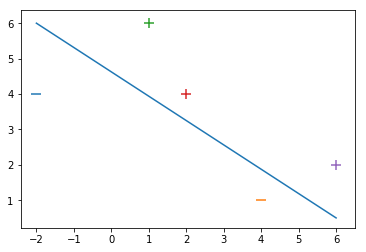

In [4]:
# 일반적으로 Machine Learning 은 데이터를 정리하거나 나누거나 미래를 보이는 그 '함수' 혹은 '공식' 을 구하는 것 입니다. 
# 이번 경우는 상기 설명처럼, 데이터를 나누는 평면을 (공식을) 구하는 것이 목적입니다. 

# 아주 간단한 예로 SVM을 실습해 보겠습니다.

# 수학 함수들을 사용하기 위헤 Numpy 모듈을 가져옵니다. 
import numpy as np
# 해당 값들을 그래프로 표현하기 위헤 역시 Matplotlib을 가져옵니다. 
from matplotlib import pyplot as plt
# 노트북에서 표현하기 위해 inline 합니다. 
%matplotlib inline

#Step 1 - 먼저 데이터를 정의합니다. 

#Input data - Of the form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#Associated output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

# 위의 셈플 데이터를 그래프로 그려보겠습니다. 
# 모든 셈플 데이터에 대해, 
for d, sample in enumerate(X):
    # 최초 2개의 negative samples 를 그리고, 
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # 나머지 positive samples 를 그립니다. 
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# 적당히 두 갈래로 나눌 수 있도록 선을 예상하여 그러봅니다. 
plt.plot([-2,6],[6,0.5])

**기계학습에서 목적 달성을 위해선 두 가지를 고려해야 합니다.**

 1. 최소화할 것 (Loss Fuction)
 2. 최적화할 것 (Objective Function) 





- 먼저 Loss Function 에는Hinge loss 함수를 사용하겠습니다. 

    1.  이 함수는 보통 위에서 이야기 한 분류모델의 Maximum-margin을 늘리기 위해 사용됩니다. 
    2.  https://github.com/llSourcell/Classifying_Data_Using_a_Support_Vector_Machine/blob/master/support_vector_machine_lesson.ipynb
    3. 역시 상단 링크의 loss function 부분의 공식을 참고해 주세요. 
    4. 참고) +기호는 y*f(x)가 1이상인 경우 그냥 0으로 치겠다는 뜻 입니다. 



- 최적화 할 공식 역시 상기 링크에 나와 있는데, **min(람다)(w)^2 + 시그마(1-y(x,w))** 로 표현됩니다. 

- 앞 부분 (min(람다)(w)^2) 을 regularizer (정규화공식) 라 칭하며, 뒷 부분은 loss 입니다. 



공식의 진행을 보시면 아시겠지만 이 경우에도 역시 Gradient Decent을 이용합니다, 

**1. 만약 셈플이 잘못 분류되었다면** => 
    - 앞 부분을 편미분 하고 뒷 부분 역시 편미분하여,
    - 두 부분 모두의 기울기를 사용하여 w 즉 가중치를 업데이트합니다. 
    - 이 경우 공식은 w = w + n(yixi - 2(람다)w) 가 됩니다. 여기서 n 은 Learning Rate, 즉 학습 속도입니다. 
**2. 그러나 셈플이 잘 분류되었다면** =>
    - 그냥 정규화공식의 기울기로 w 즉 가중치를 업데이트합니다. 
    - 이 경우 공식은 w = w + n(-2(람다)w) 가 됩니다.

때문에 여기서 학습 속도란, 알고리즘이 경사 하강을 얼만큼씩 하는지이며 이 안엔 정규화공식이 포함되어 있습니다. 

**이 시점에서 앞 부분, 즉 정규화에 대한 명확한 이해가 중요합니다.** 
- 정규화공식은 Margin Maximization 과 Loss의 벨런스를 맞춥니다. 
- 마진 최대화가 목적인 것은 맞으나, 
    1. n 즉 학습속도가 너무 높은 경우, 알고리즘이 최적 포인트를 너무 빠르게 지나가버릴 수 있습니다. 
    2. n 즉 학습속도가 너무 느린 경우, 알고리즘이 평생 최적 포인트를 못 찾을 수 도 있습니다. 
    
    
- 또한 여기서 정규화공식은 트레이닝데이터에서의 오류와 테스트데이터사이에서의 오류의 벨런스도 맞추는데, 
    1. 너무 정규화한 경우 -> Overfit (오버피팅 되며 테스트데이터에서 높은 오차율을 내게 됩니다.)
        - 쉽게 보자면 모든 트레이닝 데이터를 너무 완벽하게 학습해버려, 실제 모르는 데이터에서는 높은 오차율을 내게 됩니다. 
    2. 너무 정규화안한 경우 -> Underfit (너무 언더피팅되어 트레이닝데이터 자체에서 높은 오차율을 내게 됩니다.)

In [5]:
# 위의 이론을 기반으로 경사 하강법을 통해 두 가지 상태를 분류하는 하이퍼플레인을 구해보겠습니다.

def svm_sgd_plot(X, Y):
    # SVM의 가중치를 초기화합니다.
    w = np.zeros(len(X[0]))
    #The learning rate
    # 학습속도
    eta = 1
    # 몇 번 반복할지를 정의합니다.
    epochs = 100000
    # 잘못 분류된 경우 이를 기록해, 시간이 지남에 따라 얼마나 오류가 줄어들고 있는지 확인하기 위한 리스트입니다.
    errors = []

    # 위의 이론을 기반으로 함수를 코딩합니다.
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            # 분류가 잘못되었을 경우의 가중치 업데이트
            if (Y[i]*np.dot(X[i], w)) < 1:
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            # 분류가 잘 되었을 경우의 가중치 업데이트
            else:
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #잘못 분류된 횟수가 어떻게 줄어들고 있는지 확인하기 위해 그래프를 그려봅니다.
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

# SVM알고리즘 자체는 수학만 확실하다면 고작 14줄의 코딩으로 완성됨을 볼 수 있습니다.

/home/apostsik/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


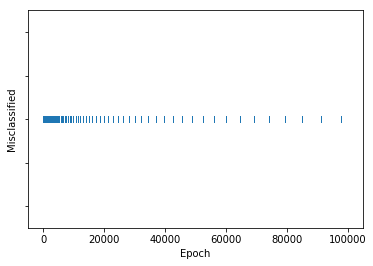

In [6]:
w = svm_sgd_plot(X,y)
# 세대가 지남에 따라 점점 오류가 줄어들고 있음을 확인할 수 있습니다. 
# SVM이 점점 최적화된 하이퍼플래인을 찾아내고 있습니다.

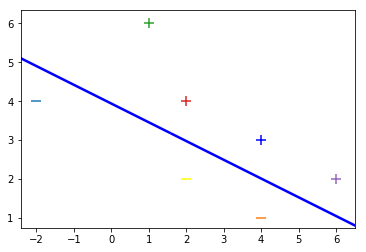

In [7]:
for d, sample in enumerate(X):
    # - 셈플들을 그립니다.
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # + 셈플들을 그립니다.
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# 테스트데이터를 추가합니다. 
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# svm_sgd() 가 계산해낸 하이퍼플래인을 그립니다. 
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')

3.Second Order Optimazation
==
- 영상) https://www.youtube.com/watch?v=UIFMLK2nj_w&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D&index=3
- 상기 경사 하강법에서는 도함수 (First Order)만을 사용하였지만, 더 나아가 이계도함수 (Second Order)를 사용하여 최적화를 하는 방법을 알아보겠습니다. 
- 도함수는 어떠한 시점에서 해당 본 함수가 증가하고 있는지 혹은 감소하고 있는지를 나타내지만,
- 이계도함수는 해당 시점에서 도함수가 증가하고 있는지 혹은 감소하고 있는지를 나타냅니다.  


- 이계도함수는 표면의 곡률을 무시하지 않기 때문에, 경사 하강법보다 더 좋은 경우가 있을 수 있으나, 많은 계산량이 필요합니다.
- 이번 예제는 실제로 안 해보셔도 괜찮습니다. (4.에서 바로 다시 다루기 때문.)


- 영상에서는 '뉴턴 방법'을 소개합니다. 뉴턴 방법은, 스칼라변수로 이루어져있고 미분 가능한 연속 함수를 푸는 여러가지 방법을 이야기합니다. 

1. Finding Roots (할선법)
    - 이 방법은 결과적으로 x절편을 찾아갑니다.
    - 영상에서 기울기를 찾고 해당 기울기가 갖는 x절편에서 다시 해당 위치의 기울기에서 x절편을 찾아가는 영상을 확인해보세요.
2. Optimazation (이분법) 
    - 이 방법은 근이 반드시 존재하는 폐구간을 이분한 후, 이 중 근이 존재하는 하위 폐구간을 선택하는 것을 반복하여서 근을 찾는 알고리즘입니다.
    - 역시 영상을 확인해 보세요.

In [10]:
# Finding Roots의 예제입니다.
"""
Newton's method
Author: Daniel Homola
Licence: BSD 3-clause
"""

from scipy.optimize import newton
from sklearn.utils.testing import assert_almost_equal

def f(x):
    return 6*x**5-5*x**4-4*x**3+3*x**2
def df(x):
    return 30*x**4-20*x**3-12*x**2+6*x

def dx(f, x):
    return abs(0-f(x))
    
def newtons_method(f, df, x0, e, print_res=False):
    delta = dx(f, x0)
    while delta > e:
        x0 = x0 - f(x0)/df(x0)
        delta = dx(f, x0)
    if print_res:
        print ('Root is at: ', x0 )
        print ('f(x) at root is: ', f(x0))
    return x0

def test_with_scipy(f, df, x0s, e):
    for x0 in x0s:
        my_newton = newtons_method(f, df, x0, e)
        scipy_newton = newton(f, x0, df, tol=e)
        assert_almost_equal(my_newton, scipy_newton, decimal=5)
        print ('Tests passed.')

if __name__ == '__main__':
    # run test
    x0s = [0, .5, 1]    
    test_with_scipy(f, df, x0s, 1e-5)
        
    for x0 in x0s:
        newtons_method(f, df, x0, 1e-10, True)

Tests passed.
Tests passed.
Tests passed.
Root is at:  0
f(x) at root is:  0
Root is at:  0.6286669787778999
f(x) at root is:  -1.8043344596208044e-12
Root is at:  1
f(x) at root is:  0


/home/apostsik/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/scipy/optimize/zeros.py:169: RuntimeWarning: derivative was zero.
  warnings.warn(msg, RuntimeWarning)


In [16]:
# Optimazation의 예제입니다. (하단 링크)

# https://github.com/llSourcell/Second_Order_Optimization_Newtons_Method/blob/master/newtons_method_optimization.py

기본적으로 
 - First Order Optimization 은 도함수를 이용하고 -> Jacaobian Matrix를 사용하며
 - Second Order Optimization 은 이계도함수를 이용하고 -> Hessian Matrix를 사용합니다. 


또한, 특정 상황에서는 이계도함수가 더 좋은 경우가 생길 수 있습니다. 

4.Logistic Regression (로지스틱 회귀)
==
영상) https://www.youtube.com/watch?v=D8alok2P468&index=4&list=PL2-dafEMk2A7mu0bSksCGMJEmeddU_H4D

- 로지스틱 회귀는 일반적으로 Classification에 이용됩니다. 
- 이번에는 특정한 데이터를 받아, 당뇨 환자를 구분하는 예제를 실습하여 볼 것인데, 
- 3.에서 나온 뉴턴 방법을 이용하여 로지스틱 선형회귀를 구현하여 보겠습니다.

- 선형회귀는 연속적인 다음 값을 예측하지만, 로지스틱 회귀는 시그모이드함수를 이용하여 특정한 값에서 분류를 실시합니다. 
- 0 혹은 1 같은 확실한 분류를 위해 사용됩니다. (위의 예시처럼 당뇨가 있다 or 없다.)
- 기본적인 공식은 1/(1+exp(-x))입니다. 
- exp(-x)을 사용하는 이유는 exp(-x)의 도함수는 exp(-x)라는 특성을 이용하기 위함입니다. 


- 결과적으로 Linear SVM과 로지스틱 회귀는 동일한 분류를 진행할 수 있습니다.
- 또한 SVM과 로지스틱 회귀는 손실함수가 비슷하기 때문에 그 학습결과 또한 유사한 경향을 보이게 됩니다. 
- 다만, SVM은 Non-linear 한 분류도 진행할 수 있으며, 일반화에 유리하여 확장성에 유용합니다. 
- 그러나 로지스틱 회귀는 Bayesian 모델에서 사용될 수 있으며, 데이터의 갯수가 많다면 더 유리할 수 있습니다. 
- 이 부분은 Gaussian Kernel이 더해진 SVM을 학습할 시 더 자세하게 다루게 됩니다. 


이번 데이터는 몸무게, 키, 혈압을 기반으로 환자가 당뇨가 있을지 없을지에 대한 분류를 진행합니다. 



- MLE는 Maximum likelihood of estimation으로, 한 테스팅 데이터를 받았을 때 
- NN등에서 만든 모델이 성공적으로 분류할 확률을 높히는 과정이라고 생각할 수 있습니다. 
- 이 경우 뉴턴방법을 사용하여, 로지스틱 회귀의 MLE를 진행하는 것 입니다. (Backpropagation과 같은 개념입니다.)


- 뉴턴 방법은 경사 하강보다 더 빠르게 MLE를 이룰 수 있게 하여 줍니다.
- 매 회차마다 경사 하강 더 효과적으로 진전하는 이유는, 이가 Hessian의 inverse를 계산하기 때문입니다. 


- 선택) 왜 퓨어한 확률이 아닌 log(odd)를 사용하는지 이해하고 넘어가면 좋습니다.

In [28]:
%matplotlib inline

#matrix math
import numpy as np
#data manipulation
import pandas as pd
#matrix data structure
from patsy import dmatrices
#for error logging
import warnings

In [29]:
# 시그모이드 함수를 정의합니다. 
def sigmoid(x):
    '''Sigmoid function of x.'''
    return 1/(1+np.exp(-x))

In [36]:
# 시드 번호를 정하게 되면, 매번 같은 랜덤 숫자를 생성하게 됩니다. 
# 매번 같은 랜덤 숫자를 생성해야, 재생산과 디버깅에 효율적이기 때문에 시드 번호를 생성하는 것이 좋습니다.
np.random.seed(0) # 시드 번호를 정합니다.

##Step 1 - 모델의 parameters 를 정의합니다. (하이퍼 파라미터)

## 알고리즘 세팅

# 모델이 언제 학습을 멈출지를 정합니다. 
tol=1e-8 # convergence tolerance
# 오버피팅을 막기 위해 l2-정규화를 진행합니다.

# l1 정규화와 l2 정규화는 상당히 유명한 정규화 방법입니다. 
# l1 정규화는 단순히 가중치의 도합이며, (데이터셋이 적고 계산량이 많지 않으면 l1을)
# l2 정규화는 가중치 제곱의 도합입니다. (데이터셋이 크고 계산량이 많으면 l2를 일반적으로 사용합니다.)
lam = None
# 최대 허용 반복횟수
max_iter = 20 

## 데이터 세팅
# covariance 는 두 데이터가 어떻게 움직이는지에 대한 변수입니다.
r = 0.95 # 양수이면 점점 가까워지며, 음수이면 점점 멀어집니다. 이 경우 점점 가까워져야 합니다. 
n = 1000 # 데이터셋의 사이즈입니다.  
sigma = 1 # 데이터가 얼마나 넓게 퍼진지에 대한 변수입니다. 

## 모델 세팅
beta_x, beta_z, beta_v = -4, .9, 1 # true beta coefficients
var_x, var_z, var_v = 1, 1, 4 # variances of inputs

## 모델의 모양을 정의합니다. 
formula = 'y ~ x + z + v + np.exp(x) + I(v**2 + z)'

In [38]:
## https://github.com/llSourcell/logistic_regression_newtons_method/blob/master/NewtonCode.ipynb

## 이후는 해당 노트북을 끝까지 참고합니다. 